In [1]:
using DelimitedFiles, Plots, Statistics

In [2]:
using CurveFit, LaTeXStrings

# read 1 run

In [ ]:
path = "tmp_stab/res_epid_stab/"

In [ ]:
extension= "_run101"
#extension = ""
T=8
LAM=1.0
GAM=0.0155
N=50000
iter=500

TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)

namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
@show namefile
file = readdlm(namefile);
res = file[3:end,1:4];

iter_full=findall(.!isnan.(res[:,1]));
@show iter_full[end]

pF=plot(xaxis="iter", yaxis="free energy", title=TIT);
plot!(pF,res[iter_full,3], label="")

perr = plot(xaxis="iter", yaxis="err");
plot!(perr, res[iter_full[12:end],2], label="")

plot(pF, perr, layout=(1,2), size=(800,300), margin=5*Plots.mm)

In [ ]:
halfiter=Int64(iter/2)+2
@show halfiter

iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])
@show  res[iter_Δ[end],4]
log_Δ = log.(res[iter_Δ[halfiter:end],4])
pΔ = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pΔ, log_Δ, label="")

if res[iter_Δ[end],4] < 1
    ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
    frac_cut = 3
    lsta = Int64(round(length(ratio_Δ)/frac_cut))
    lend = length(ratio_Δ)-lsta
    lmid=Int64(round((lend+lsta)/2))
    vline!(pΔ, [lsta], color=4, label="")
    vline!(pΔ, [lend], color=4, label="")

    #geometrical mean
    gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))
    #@show gmΔ
    diff = log(gmΔ)*lmid - log_Δ[lmid] 
    #plot!(pΔ, log(gmΔ).*(1:length(ratio_Δ)).-diff, label="")
    
    #linear fit
    log_Δ_cut = log_Δ[lsta:lend]
    (a,b)=linear_fit(lsta:lend, log_Δ_cut)
    sfitΔ = exp(b)
    @show sfitΔ
    diff_fit = b*lmid - log_Δ[lmid]  
    plot!(pΔ, b.*(1:length(ratio_Δ)).-diff_fit, label="fit")

    pratio = plot();
    plot!(pratio,ratio_Δ)
    hline!(pratio, [gmΔ], label="geo mean")
    vline!(pratio, [lsta], color=4, label="")
    vline!(pratio, [lend], color=4, label="")

    plot(pΔ)#, pratio, layout=(1,2), size=(800,300), margin=5*Plots.mm)
else
    gmΔ=Inf
    plot(pΔ)
end

In [ ]:
p1run = plot(pF, perr, pΔ, layout=(1,3), size=(1000,300), margin=5*Plots.mm)

In [ ]:
mean(res[halfiter:end-1,3]), std(res[halfiter:end-1,3])

In [ ]:
#savefig(p1run, "freen_err_stab_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

# loop on γ (10 runs per γ)

In [8]:
T=8
LAM=1.0
path = "tmp_stab/res_epid_stab/"
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));
N=50000
iter=500

runs_range = 101:110
γ16 = [0.016, 0.0165, 0.0167, 0.0168]
γ17 = [0.017, 0.0172, 0.0173, 0.0175, 0.0177, 0.0178]
γ18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0185]
γ_range=vcat([0.0155], γ16, γ17, γ18, [0.019, 0.02, 0.021]);
nbruns = length(runs_range)

10

In [9]:
gam_res = zeros(length(γ_range), length(runs_range));
err_res = zeros(length(γ_range), length(runs_range));
for iγ in 1:length(γ_range)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        GAM=γ_range[iγ]

        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*foldergam*"fileres_epid_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        
        res = file[3:end,1:4]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

        if res[iter_Δ[end],4] < 1
            #linear fit
            ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            log_Δ = log.(res[iter_Δ[halfiter:end],4])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=Inf
        end
        
        if (run==108 && GAM==0.0183) sfitΔ = Inf end #remove runs with jump in the slope

        err=std(res[halfiter:end-1,3]) #res[end-1,2]
        err_res[iγ,irun]=err
        #@show GAM, run, err, sfitΔ
        
        gam_res[iγ,irun]=sfitΔ
    end
end

In [10]:
mean_err = zeros(length(γ_range))
std_err = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    mean_err[iγ]=mean(err_res[iγ,:])
    std_err[iγ]=std(err_res[iγ,:])
end

In [11]:
permutedims(gam_res)

10×19 Matrix{Float64}:
 Inf        Inf         0.850123   0.831416  …  0.63554   0.567681  0.509293
 Inf         0.902744   0.861454  Inf           0.634477  0.569053  0.508746
 Inf        Inf         0.851928   0.829432     0.635395  0.568571  0.50865
 Inf         0.902816   0.851136   0.83021      0.635916  0.567801  0.508484
 Inf        Inf        Inf         0.830722     0.635467  0.56795   0.509062
 Inf        Inf        Inf         0.829266  …  0.634206  0.56764   0.508799
  0.972545  Inf        Inf        Inf           0.634965  0.568139  0.508814
 Inf        Inf         0.849459   0.829914     0.634667  0.568408  0.509098
  0.962111   0.910097  Inf         0.830856     0.635236  0.568025  0.510173
 Inf        Inf        Inf         0.829662     0.636548  0.568533  0.508632

In [12]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(γ_range))
std_stab = zeros(length(γ_range));
for iγ in 1:length(γ_range)
    γ=γ_range[iγ]
    indicesconv=.!isinf.(gam_res[iγ,:])
    @show γ, indicesconv
    mean_stab[iγ]=mean(gam_res[iγ,indicesconv])
    std_stab[iγ]=std(gam_res[iγ,indicesconv])
end

(γ, indicesconv) = (0.0155, Bool[0, 0, 0, 0, 0, 0, 1, 0, 1, 0])
(γ, indicesconv) = (0.016, Bool[0, 1, 0, 1, 0, 0, 0, 0, 1, 0])
(γ, indicesconv) = (0.0165, Bool[1, 1, 1, 1, 0, 0, 0, 1, 0, 0])
(γ, indicesconv) = (0.0167, Bool[1, 0, 1, 1, 1, 1, 0, 1, 1, 1])
(γ, indicesconv) = (0.0168, Bool[1, 1, 1, 1, 1, 1, 0, 0, 0, 1])
(γ, indicesconv) = (0.017, Bool[1, 1, 1, 1, 0, 1, 1, 1, 1, 0])
(γ, indicesconv) = (0.0172, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0173, Bool[0, 1, 1, 1, 0, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0175, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0177, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0178, Bool[1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.018, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0181, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.0182, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0183, Bool[1, 1, 1, 1, 1, 1, 1, 0, 1, 1])
(γ, indicesconv) = (0.0185, Bool[1, 1, 1, 1

In [13]:
hcat(γ_range, mean_stab,std_stab)

19×3 Matrix{Float64}:
 0.0155  0.967328  0.00737751
 0.016   0.905219  0.00422493
 0.0165  0.85282   0.00491798
 0.0167  0.830185  0.00075717
 0.0168  0.821375  0.00146457
 0.017   0.800748  0.000845929
 0.0172  0.782139  0.000712235
 0.0173  0.772935  0.000516044
 0.0175  0.75538   0.000793635
 0.0177  0.737301  0.000724937
 0.0178  0.729219  0.000836892
 0.018   0.711964  0.000845549
 0.0181  0.703807  0.000920449
 0.0182  0.696023  0.000561499
 0.0183  0.687711  0.000743967
 0.0185  0.672027  0.000674383
 0.019   0.635242  0.00069829
 0.02    0.56818   0.000453875
 0.021   0.508975  0.000486742

In [14]:
fit_range_plot=0.015:0.001:0.021;
(a0,a1,a2)=poly_fit(γ_range, mean_stab, 2)

3-element Vector{Float64}:
    4.232104324063489
 -306.0917638003853
 6139.609261523196

In [15]:
discrim=a1^2-4*a2*(a0-1)
solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)

(0.015183311081921688, 0.03467194041081679)

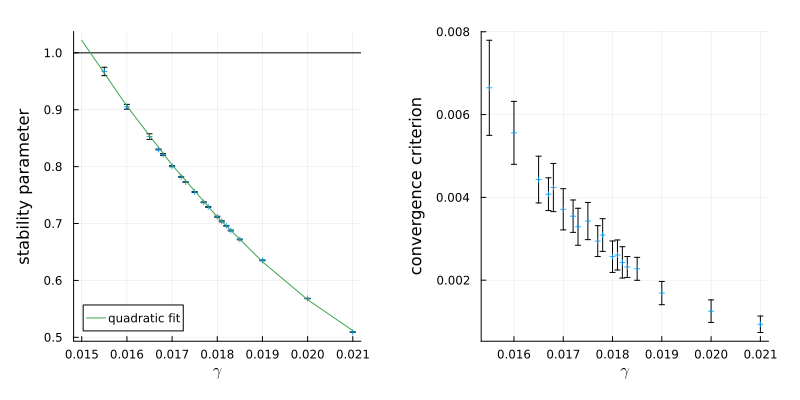

In [16]:
pstab=plot(yaxis="stability parameter", xaxis=L"γ")
scatter!(pstab,γ_range,mean_stab, yerr=std_stab, label="", markershape=:+, markerstrokewidth=1, markersize = 3);
hline!(pstab, [1], color="black", label="")
plot!(pstab, fit_range_plot, a2.*fit_range_plot.*fit_range_plot .+ a1.*fit_range_plot .+ a0, label="quadratic fit")

pconv=plot(yaxis="nb runs with Δ converged", xaxis=L"γ")
scatter!(pconv, γ_range,frac_conv.*nbruns, label="", markershape=:x, markerstrokewidth=2);

pTIT="stability parameter ("*string(nbruns)*"runs) (T="*string(T)*", λ="*string(LAM)*", N="*string(N)*")"

perr=plot(yaxis="convergence criterion", xaxis=L"γ")
scatter!(perr,γ_range,mean_err, yerr=std_err, label="", markershape=:+, markerstrokewidth=1, markersize = 3);

#pγ= plot(pstab, perr, pconv, size=(1000,330), layout=(1,3), margin=6*Plots.mm, plot_title=pTIT)
pγ= plot(pstab, perr, size=(800,400), layout=(1,2), margin=6*Plots.mm)

In [45]:
savefig(pγ, "stabav_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

"/home/louise/Documents/PostDoc_Turin/Projet-Epidemics/Epidemble-RSB/Git/Epid_stab/stabav_T8_λ1.0_N50000.pdf"

# loop on γ on single graphs (10 runs per γ)

In [3]:
T=8
LAM=1.0
path = "tmp_stab/res_epid_1graph_stab/"
pfits = plot(xaxis="γ", title="stability parameter (10 graphs): T="*string(T)*", λ="*string(LAM));
N=50000
iter=500

runs_range = 1:10
γ_range_1=0.014:0.001:0.021;
nbruns = length(runs_range)

10

In [4]:
gam_res_1 = zeros(length(γ_range_1), length(runs_range));
err_res_1 = zeros(length(γ_range_1), length(runs_range));
for iγ in 1:length(γ_range_1)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        GAM=γ_range_1[iγ]
        #@show iγ, GAM, irun

        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*foldergam*"fileres_epid_1graph_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        if size(file)[1]==2
            err_res_1[iγ,irun]=Inf
            gam_res_1[iγ,irun]=Inf
            continue
        end
        res = file[3:end-1,1:3]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])

        if res[iter_Δ[end],3] < 1
            #linear fit
            ratio_Δ = [abs(res[i,3]/res[i-1,3]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            log_Δ = log.(res[iter_Δ[halfiter:end],3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=Inf
        end
        
        err=std(res[halfiter:end-1,2]) #res[end-1,2]
        err_res_1[iγ,irun]=err
        #@show GAM, run, err, sfitΔ
        
        gam_res_1[iγ,irun]=sfitΔ
    end
end

In [5]:
frac_conv = sum(.!isinf.(gam_res_1), dims=2)./length(runs_range)
mean_stab_1 = zeros(length(γ_range_1))
std_stab_1 = zeros(length(γ_range_1));
mean_err_1 = zeros(length(γ_range_1))
std_err_1 = zeros(length(γ_range_1));
for iγ in 1:length(γ_range_1)
    γ=γ_range_1[iγ]
    indicesconv=.!isinf.(gam_res_1[iγ,:])
    @show γ, indicesconv
    mean_stab_1[iγ]=mean(gam_res_1[iγ,indicesconv])
    std_stab_1[iγ]=std(gam_res_1[iγ,indicesconv])
    mean_err_1[iγ]=mean(err_res_1[iγ,indicesconv])
    std_err_1[iγ]=std(err_res_1[iγ,indicesconv])
end

(γ, indicesconv) = (0.014, Bool[1, 0, 1, 1, 1, 0, 1, 0, 0, 1])
(γ, indicesconv) = (0.015, Bool[0, 1, 1, 0, 1, 0, 0, 1, 0, 1])
(γ, indicesconv) = (0.016, Bool[1, 1, 1, 0, 1, 0, 1, 1, 1, 1])
(γ, indicesconv) = (0.017, Bool[1, 1, 1, 1, 1, 0, 1, 1, 1, 1])
(γ, indicesconv) = (0.018, Bool[1, 0, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.019, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.02, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(γ, indicesconv) = (0.021, Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


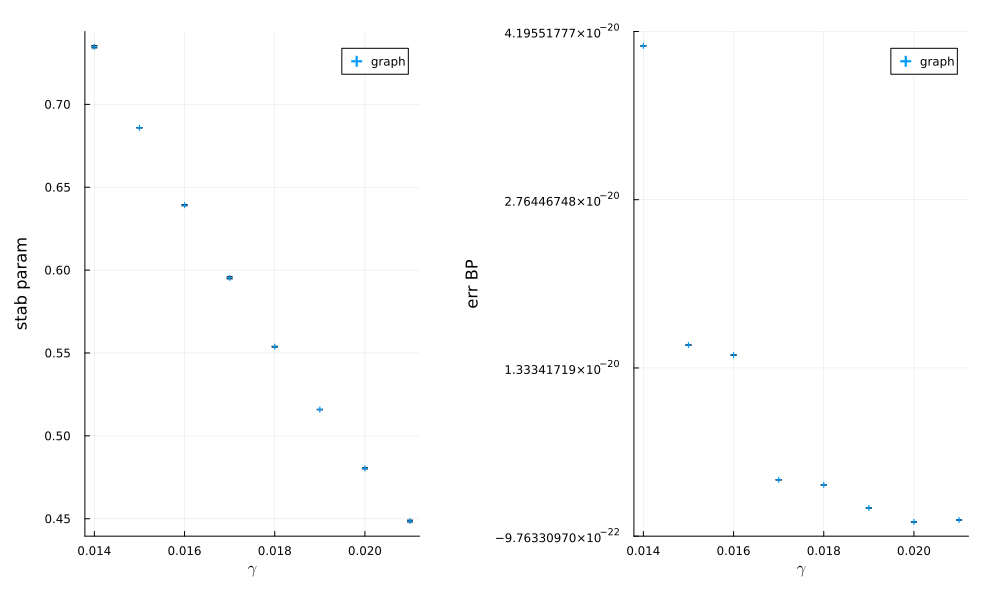

In [7]:
pstab_1=plot(yaxis="stab param", xaxis=L"γ")
scatter!(pstab_1,γ_range_1,mean_stab_1, yerr=std_stab_1, label="graph", markershape=:+, markerstrokewidth=1, markersize = 3)
#scatter!(pstab_1,γ_range,mean_stab, yerr=std_stab, label="pop", markershape=:+, markerstrokewidth=1, markersize = 3);

perr_1=plot(yaxis="err BP", xaxis=L"γ")
scatter!(perr_1,γ_range_1,mean_err_1, yerr=std_err_1, label="graph", markershape=:+, markerstrokewidth=1, markersize = 3)
#scatter!(perr_1,γ_range,mean_err, yerr=std_err, label="pop", markershape=:+, markerstrokewidth=1, markersize = 3);

pγ_1= plot(pstab_1, perr_1, size=(1000,600), layout=(1,2), margin=6*Plots.mm)#, plot_title=pTIT)

# loop on γ (1 run per γ)

In [ ]:
T=8
LAM=1.0
pfits = plot(xaxis="γ", title="stability parameter: T="*string(T)*", λ="*string(LAM));

In [ ]:
N=10000
iter=500

In [ ]:
extension=""

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter = []
res_finalΔ = []
res_geomean = []
res_fit = []

g18 = [0.018, 0.0181, 0.0182, 0.0183, 0.0184, 0.0185, 0.0186, 0.0188]
g19 = [0.019, 0.0192, 0.0196]
g20 = [0.02, 0.0205, 0.021, 0.022, 0.03]
GAM_range = vcat(g18,g19,g20)

for GAM in GAM_range
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter, iter_full[end])
    append!(res_finalΔ, res[iter_Δ[end],4])
    append!(res_geomean, gmΔ)
    append!(res_fit, sfitΔ)
    
end

In [ ]:
scatter!(pfits, GAM_range, res_fit, label="large IC N="*string(N), markershape=:+, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range, res_geomean, label="geo N="*string(N), markershape=:+, markerstrokewidth=2, markersize = 4)

In [ ]:
extension="_run101"

println("#1.γ \t 2.Δ[t=end] \t 3.λ(geometrical mean) \t 3.λ(fit)")
res_nbiter_101 = []
res_finalΔ_101 = []
res_geomean_101 = []
res_fit_101 = []

GAM_range_101 = [0.018, 0.0182, 0.0185, 0.019, 0.02]


for GAM in GAM_range_101
    foldergam="gam"*string(GAM)*"/"
    nameparams="T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*"fileres_epid_stab_"*nameparams*extension
    file = readdlm(namefile);
    res = file[3:end,1:4];

    iter_full=findall(.!isnan.(res[:,1]));
    halfiter=Int64(iter/2)+2
    iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

    log_Δ = log.(res[iter_Δ[halfiter:end],4])

    if res[iter_Δ[end],4] < 1
        #geometrical mean
        ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
        frac_cut = 3
        lsta = Int64(round(length(ratio_Δ)/frac_cut))
        lend = length(ratio_Δ)-lsta
        lmid=Int64(round((lend+lsta)/2))
        gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))

        #linear fit
        log_Δ_cut = log_Δ[lsta:lend]
        (a,b)=linear_fit(lsta:lend, log_Δ_cut)
        sfitΔ = exp(b)
        
    else
        gmΔ=Inf
        sfitΔ = Inf
    end
    println(GAM, "\t", res[iter_Δ[end],4], "\t", gmΔ, "\t", sfitΔ)
    append!(res_nbiter_101, iter_full[end])
    append!(res_finalΔ_101, res[iter_Δ[end],4])
    append!(res_geomean_101, gmΔ)
    append!(res_fit_101, sfitΔ)
    
end

In [ ]:
scatter!(pfits, GAM_range_101, res_fit_101, label="small IC N="*string(N), markershape=:x, markerstrokewidth=1, markersize = 4)
#scatter!(pfits, GAM_range_101, res_geomean_101, label="geo2 N="*string(N), markershape=:x, markerstrokewidth=2, markersize = 4)

In [ ]:
#savefig(pfits, "checkIC_T"*string(T)*"_LAM"*string(LAM)*".pdf")

In [ ]:
fitrange = 0.013:0.001:0.03

#fit a_s*(x-c_s)
a_s             = 53.308           #+/- 0.7836       (1.47%)
c_s             = 0.0165002        #+/- 4.744e-05    (0.2875%)
pfs=plot(yaxis="(1-stab_param)^2",xaxis="γ")
scatter!(pfs, GAM_range, (1.0 .-res_geomean).^2, label="N="*string(N), markershape=:+)
plot!(pfs, fitrange, a_s.*(fitrange.-c_s), label="linear fit")
hline!(pfs, [0], label="")

In [ ]:
#fit lin a_l*x+b_l
a_l             = 77.1548          #+/- 1.094        (1.418%)
c_l             = 0.0142685        #+/- 6.099e-05    (0.4275%)
#fit quad a_q*(x**2)+b_q*x+c_q
a_q             = -3440.57         #+/- 662.6        (19.26%)
b_q             = 201.457          #+/- 26.36        (13.09%)
c_q             = -2.22298         #+/- 0.2613       (11.76%)
#find zeros
disc=b_q^2-4*a_q*c_q
sol1, sol2 = (-b_q-sqrt(disc))/(2*a_q), (-b_q+sqrt(disc))/(2*a_q)

In [ ]:
pflq=plot(yaxis="1-stab_param",xaxis="γ")
scatter!(pflq, GAM_range, (1.0 .-res_geomean), label="N="*string(N), markershape=:+)
plot!(pflq, fitrange, a_l.*(fitrange.-c_l), label="linear")
plot!(pflq, fitrange, a_q.*(fitrange.^2).+b_q.*fitrange.+c_q, label="quadratic")
hline!(pflq, [0], label="")

In [ ]:
plot(pfs, pflq, size=(800,400), margin=6*Plots.mm, plot_title="comparison fits (T="*string(T)*", λ="*string(LAM)*")")

In [ ]:
#savefig("fit_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*".pdf")

# size study at γ=0.0182

In [ ]:
T=8
LAM=1.0
GAM=0.0183
path = "tmp_stab/res_epid_stab/gam"*string(GAM)*"/"
iter=500
N_range=[50000]#[5000, 10000, 50000, 100000]
#runs_range = 1:10
runs_range = 101:110

In [ ]:
gam_res = zeros(length(N_range), length(runs_range));
err_res = zeros(length(N_range), length(runs_range));
list_AUC = []
list_pla = []
list_inf = [];

In [ ]:
for isiz in 1:length(N_range)
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        N=N_range[isiz]

        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        extension = "_run"
        namefile = path*"fileres_epid_stab"*nameparams*extension*string(run)
        nameobs =  path*"obs_epid_stab"*nameparams*extension*string(run)

        file = readdlm(namefile);
        fobs = readdlm(nameobs);

        res = file[3:end,1:4]
        iter_full=findall(.!isnan.(res[:,1]))
        halfiter=Int64(iter/2)+2
        iter_Δ = findall([(!isinf(res[j,4])&&!isnan(res[j,4])) for j in iter_full])

        if res[iter_Δ[end],4] < 1
            #geometrical mean
            ratio_Δ = [abs(res[i,4]/res[i-1,4]) for i in iter_Δ[halfiter:end]]
            frac_cut = 3
            lsta = Int64(round(length(ratio_Δ)/frac_cut))
            lend = length(ratio_Δ)-lsta
            gmΔ = prod(ratio_Δ[lsta:lend])^(1/length(lsta:lend))        
            #linear fit
            log_Δ = log.(res[iter_Δ[halfiter:end],4])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            gmΔ=Inf
            sfitΔ=Inf
        end
        
        err=res[end-1,2]
        err_res[isiz,irun]=err
        #@show N, run, err
        
        gam_res[isiz,irun]=sfitΔ

        res_obs = fobs[3:end,:]
        half_obs = 3*Int64(round(size(res_obs)[1]/6))
        end_obs = size(res_obs)[1]
        half_obs, end_obs
        inds_AUC=[mod(i,3) == 0 && i>half_obs for i in 1:end_obs]
        inds_pla=[mod(i,3) == 1 && i>half_obs for i in 1:end_obs]
        inds_inf=[mod(i,3) == 2 && i>half_obs for i in 1:end_obs];
        mean_AUC = mean(res_obs[inds_AUC,2:end], dims=1)[1,:]
        std_AUC = std(res_obs[inds_AUC,2:end], dims=1)[1,:]
        mean_inf = mean(res_obs[inds_inf,2:end], dims=1)[1,:]
        std_inf = std(res_obs[inds_inf,2:end], dims=1)[1,:]
        mean_pla = mean(res_obs[inds_pla,2:end], dims=1)[1,:]
        std_pla = std(res_obs[inds_pla,2:end], dims=1)[1,:];
        
        push!(list_AUC, [N_range[isiz], run, mean_AUC, std_AUC])
        push!(list_pla, [N_range[isiz], run, mean_pla, std_pla])
        push!(list_inf, [N_range[isiz], run, mean_inf, std_inf]);
    end
end

In [ ]:
for isiz in 1:length(N_range)
    N=N_range[isiz]
    mean_err=mean(err_res[isiz,:])
    std_err=std(err_res[isiz,:])
    @show isiz, mean_err, std_err
end

In [ ]:
permutedims(err_res)

In [ ]:
permutedims(gam_res)

In [ ]:
frac_conv = sum(.!isinf.(gam_res), dims=2)./length(runs_range)
mean_stab = zeros(length(N_range))
std_stab = zeros(length(N_range));
for isiz in 1:length(N_range)
    N=N_range[isiz]
    indicesconv=.!isinf.(gam_res[isiz,:])
    mean_stab[isiz]=mean(gam_res[isiz,indicesconv])
    std_stab[isiz]=std(gam_res[isiz,indicesconv])
end

In [ ]:
hcat(mean_stab,std_stab)

In [ ]:
pstab=plot(yaxis="stab param", xaxis="log_10(size)")
scatter!(pstab,log.(N_range)./log(10),mean_stab, yerr=std_stab, label="");
pconv=plot(yaxis="fraction runs with Δ converged", xaxis="log_10(size)")
scatter!(pconv, log.(N_range)./log(10),frac_conv, label="");
pTIT="size comparison at γ="*string(GAM)*" (10runs) (T="*string(T)*", λ="*string(LAM)*")"
plot(pstab, pconv, size=(900,400), margin=6*Plots.mm, plot_title=pTIT)

In [ ]:
#savefig("sizestudy_stability_parameter_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")

In [ ]:
isinf.(gam_res)

In [ ]:
iconv=22
idiv=28;

In [ ]:
pAUC = plot(xaxis="epid time", yaxis="AUC")
scatter!(pAUC, 1:(T+1), list_AUC[iconv][3], yerr=list_AUC[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pAUC, 1:(T+1), list_AUC[idiv][3], yerr=list_AUC[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
ppla = plot(xaxis="epid time", yaxis="planted marg")
scatter!(ppla, 1:(T+1), list_pla[iconv][3], yerr=list_pla[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(ppla, 1:(T+1), list_pla[idiv][3], yerr=list_pla[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
pinf = plot(xaxis="epid time", yaxis="inferred marg")
scatter!(pinf, 1:(T+1), list_inf[iconv][3], yerr=list_inf[iconv][4], label="Δ converged", markerstrokecolor = :auto)
scatter!(pinf, 1:(T+1), list_inf[idiv][3], yerr=list_inf[idiv][4], label="Δ diverged", markerstrokecolor = :auto);

In [ ]:
TIT="comparison 2 runs (γ="*string(GAM)*", T="*string(T)*", λ="*string(LAM)*")"
plot(pAUC, ppla, pinf, size=(1000,400), layout=(1,3), margin=6*Plots.mm, plot_title=TIT)

In [ ]:
#savefig("observables_divconvstability_T"*string(T)*"_LAM"*string(LAM)*"_γ"*string(GAM)*".pdf")